In [1]:
'1) Data Prep'

'''
This file prepares the MBTI source data. It does the following:
    - Imports the MBTI data sourced from: https://www.kaggle.com/datasnaek/mbti-type
    - Performs a basic spell check on the data
    - Normalizes the data
        - Normalizes without tokenization
        - Normalizes with tokenization
    - Performs SVD on the data to reduce the features
    - Saves the cleaned data a set of pickle files for modeling
'''

'\nThis file prepares the MBTI source data. It does the following:\n    - Imports the MBTI data sourced from: https://www.kaggle.com/datasnaek/mbti-type\n    - Performs a basic spell check on the data\n    - Normalizes the data\n        - Normalizes without tokenization\n        - Normalizes with tokenization\n    - Performs SVD on the data to reduce the features\n    - Saves the cleaned data a set of pickle files for modeling\n'

In [2]:
####Import libraries and modules
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import collections
import pickle

#Import Functions from Libraries
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from sklearn.decomposition import TruncatedSVD
from datetime import datetime
from sklearn.model_selection import train_test_split

#Import user defined functions
from feature_extractors import *
from normalization import *
from spelling_corrector import *
from contractions import *

In [3]:
#Initalize Stop Words and Lemmatizer
stopword_list = nltk.corpus.stopwords.words('english')
wnl = WordNetLemmatizer() 

In [4]:
####Load the data
mbti = pd.read_csv("C:/Personal/Kaggle/mbti-myers-briggs-personality-type-dataset/mbti_1.csv") 
#Source: https://www.kaggle.com/datasnaek/mbti-type

#Print top five rows
print(mbti.head(5))

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


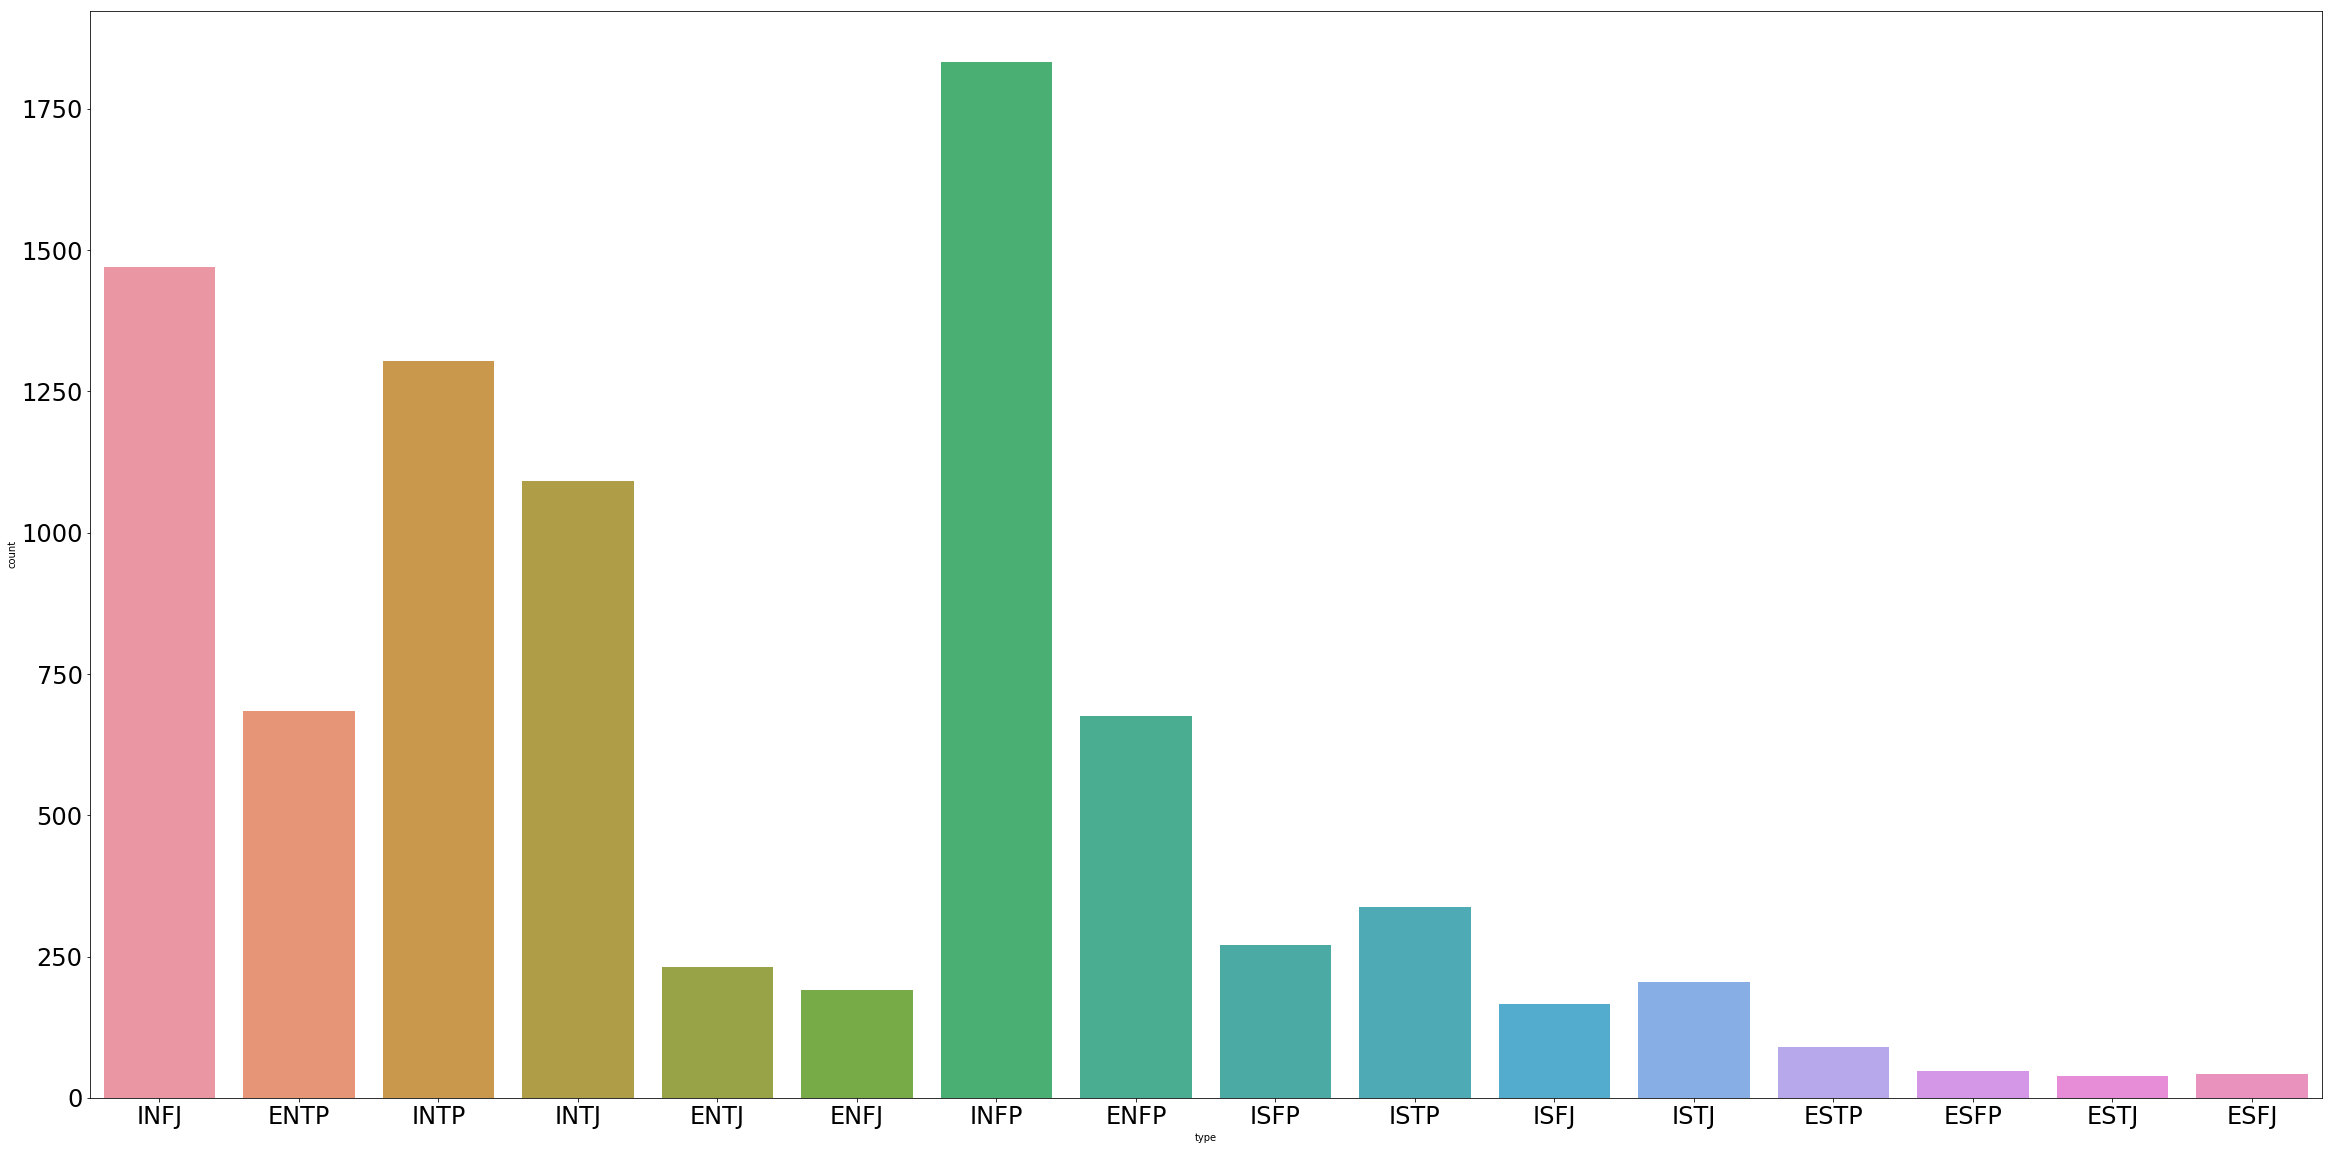

In [5]:
#Plot MBTI Type Distrbution
plt.figure(figsize=(40,20))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=mbti, x='type')
plt.show()

In [6]:
####Clean The Comments
df = mbti

#Convert MBIT to Class
unique_type_list = df.type.unique()
lab_encoder = LabelEncoder().fit(unique_type_list)

with open("LabelEncoder.pkl", "wb") as f:
    pickle.dump(lab_encoder, f, pickle.HIGHEST_PROTOCOL)

df['type_enc'] = lab_encoder.transform(df['type'])

#Replace Links
df['comment'] = df.posts.str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','url')

#Split comments based in pipes, replace with white space
df['comment'] = df.comment.str.replace('\|+',' ')

#Keep Only ASCII
df['comment'] = df.comment.str.replace('[^\x00-\x7F]+','')

#Remove Selected Puncation
df['comment'] = df.comment.str.replace('[,.:!@#$%&*()_+?><]+',' ')

#Remove Words Longer than 20 characters
df['comment'] = df.comment.str.replace('[a-zA-Z0-9_]{20,}',' ')                                       
                                       
#Remove Extra White Space
df['comment'] = df.comment.str.replace('[\s]+',' ')                                       
                                                                              
print(df.head())

   type                                              posts  type_enc  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...         8   
1  ENTP  'I'm finding the lack of me in these posts ver...         3   
2  INTP  'Good one  _____   https://www.youtube.com/wat...        11   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...        10   
4  ENTJ  'You're fired.|||That's another silly misconce...         2   

                                             comment  
0  'url url enfp and intj moments url sportscente...  
1  'I'm finding the lack of me in these posts ver...  
2  'Good one url Of course to which I say I know;...  
3  'Dear INTP I enjoyed our conversation the othe...  
4  'You're fired That's another silly misconcepti...  


In [7]:
#Correct Spelling
#df = df.sample(n=100) #Sample For Testing

#Correct Spelling
comments = df['comment'].tolist()
print(len(comments))
print(type(comments))
print()

dta = []
i = 0
for x in comments:
    if (i % 100 == 0):
        print(str(datetime.datetime.now()))
        print("Record " + str(i) + " of " + str(len(comments)))
    x = ' '.join([correct_text_generic(y) for y in x.split(' ')])
    dta.append(x)
    i += 1
                 
print(dta[0:2])
print()

8675
<class 'list'>

2017-12-30 11:36:02.589861
Record 0 of 8675
2017-12-30 11:44:13.484372
Record 100 of 8675
2017-12-30 11:51:34.625937
Record 200 of 8675
2017-12-30 11:59:22.550948
Record 300 of 8675
2017-12-30 12:06:50.457044
Record 400 of 8675
2017-12-30 12:14:19.434410
Record 500 of 8675
2017-12-30 12:22:28.201411
Record 600 of 8675
2017-12-30 12:29:55.013007
Record 700 of 8675
2017-12-30 12:37:17.826289
Record 800 of 8675
2017-12-30 12:44:34.020411
Record 900 of 8675
2017-12-30 12:51:30.496547
Record 1000 of 8675
2017-12-30 12:58:50.144759
Record 1100 of 8675
2017-12-30 13:06:09.563689
Record 1200 of 8675
2017-12-30 13:13:46.413317
Record 1300 of 8675
2017-12-30 13:21:03.972734
Record 1400 of 8675
2017-12-30 13:28:47.029392
Record 1500 of 8675
2017-12-30 13:35:41.874393
Record 1600 of 8675
2017-12-30 13:43:25.383824
Record 1700 of 8675
2017-12-30 13:50:40.734724
Record 1800 of 8675
2017-12-30 13:58:17.462189
Record 1900 of 8675
2017-12-30 14:05:50.653805
Record 2000 of 8675
2017

In [8]:
###Normalize Data
#No Tokenization
dta_notoken = normalize_corpus(dta, tokenize=False, contraction=CONTRACTION_MAP)
print(dta_notoken[0:2])
print()

clean = pd.DataFrame({'clean_comment':dta_notoken})
cleaned = pd.concat([df, clean], axis=1)
print(cleaned[0:2])
print()

cleaned.to_pickle("cleaned_mbti_userlvl.pkl")

####################################################################3
#Tokenization
dta_token = normalize_corpus(dta, tokenize=True, contraction=CONTRACTION_MAP)
print(dta_token[0:2])
print()

clean = pd.DataFrame(dta_token)
cleaned = pd.concat([df, clean], axis=1)
print(cleaned[0:2])
print()

cleaned.to_pickle("cleaned_mbti_token_userlvl.pkl")

Record 0 of 8675
Record 100 of 8675
Record 200 of 8675
Record 300 of 8675
Record 400 of 8675
Record 500 of 8675
Record 600 of 8675
Record 700 of 8675
Record 800 of 8675
Record 900 of 8675
Record 1000 of 8675
Record 1100 of 8675
Record 1200 of 8675
Record 1300 of 8675
Record 1400 of 8675
Record 1500 of 8675
Record 1600 of 8675
Record 1700 of 8675
Record 1800 of 8675
Record 1900 of 8675
Record 2000 of 8675
Record 2100 of 8675
Record 2200 of 8675
Record 2300 of 8675
Record 2400 of 8675
Record 2500 of 8675
Record 2600 of 8675
Record 2700 of 8675
Record 2800 of 8675
Record 2900 of 8675
Record 3000 of 8675
Record 3100 of 8675
Record 3200 of 8675
Record 3300 of 8675
Record 3400 of 8675
Record 3500 of 8675
Record 3600 of 8675
Record 3700 of 8675
Record 3800 of 8675
Record 3900 of 8675
Record 4000 of 8675
Record 4100 of 8675
Record 4200 of 8675
Record 4300 of 8675
Record 4400 of 8675
Record 4500 of 8675
Record 4600 of 8675
Record 4700 of 8675
Record 4800 of 8675
Record 4900 of 8675
Record 5000 

Record 1700 of 8675
Record 1800 of 8675
Record 1900 of 8675
Record 2000 of 8675
Record 2100 of 8675
Record 2200 of 8675
Record 2300 of 8675
Record 2400 of 8675
Record 2500 of 8675
Record 2600 of 8675
Record 2700 of 8675
Record 2800 of 8675
Record 2900 of 8675
Record 3000 of 8675
Record 3100 of 8675
Record 3200 of 8675
Record 3300 of 8675
Record 3400 of 8675
Record 3500 of 8675
Record 3600 of 8675
Record 3700 of 8675
Record 3800 of 8675
Record 3900 of 8675
Record 4000 of 8675
Record 4100 of 8675
Record 4200 of 8675
Record 4300 of 8675
Record 4400 of 8675
Record 4500 of 8675
Record 4600 of 8675
Record 4700 of 8675
Record 4800 of 8675
Record 4900 of 8675
Record 5000 of 8675
Record 5100 of 8675
Record 5200 of 8675
Record 5300 of 8675
Record 5400 of 8675
Record 5500 of 8675
Record 5600 of 8675
Record 5700 of 8675
Record 5800 of 8675
Record 5900 of 8675
Record 6000 of 8675
Record 6100 of 8675
Record 6200 of 8675
Record 6300 of 8675
Record 6400 of 8675
Record 6500 of 8675
Record 6600 of 8675


   type                                              posts  type_enc  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...         8   
1  ENTP  'I'm finding the lack of me in these posts ver...         3   

                                             comment     0     1     2      3  \
0  'url url enfp and intj moments url sportscente...   url   url  enfp   intj   
1  'I'm finding the lack of me in these posts ver...  find  lack  post  alarm   

        4     5  ...    886   887   888   889   890   891   892   893   894  \
0  moment   url  ...   None  None  None  None  None  None  None  None  None   
1     sex  bore  ...   None  None  None  None  None  None  None  None  None   

    895  
0  None  
1  None  

[2 rows x 900 columns]



In [9]:
#Train Test Split
X = dta_notoken
y = df['type_enc']
print(len(X))
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

print(len(X_train))
print(X_train[:2])
print()

print(len(X_test))
print(X_test[:2])
print()

print(len(y_train))
print(y_train[:2])
print()

print(len(y_test))
print(y_test[:2])
print()


8675
8675
7807
['high school still hop go major become therapist psychologist psychiatric ever one get help people understand people sixteen one month four month relationship felt great afterwards keep end bit relationship end relationship period time cool sit coffee shop read earnest hemmingway f scott fitsgerald france yes usually dominate julian archetype form also religion overlie group belief people follow mythology either standalone part help someone try validity feeling want make feel normal also try help solve whatever bother step step maybe ask question figure exactly alone edit suppose cap make humorous look sad still mean real two people case infp question probably even believe two people would nationalize somehow think feel fdjga def b sup little overwhelming time gun rule ok hata never say even try imply way wonder many question pertain god would really like know answer really meet boy back thing click within half hour talk share secret concern eachother last week sensitiv

In [10]:
#Feature Extraction
bow_vectorizor, bow_features = bow_extractor(X_train, ngram_range=(1,1))
bow_features = bow_features.todense()
print("bow_features shape: " + str(bow_features.shape))

tfidf_vectorizor, tfidf_features = tfidf_transformer(bow_features)
tfidf_features = tfidf_features.todense()
print("tfidf_features shape: " + str(tfidf_features.shape))

bow_features_test = bow_vectorizor.transform(X_test)
bow_features_test = bow_features_test.todense()
print("bow_features_test shape: " + str(bow_features_test.shape))

tfidf_features_test = tfidf_vectorizor.transform(bow_features_test)
tfidf_features_test = tfidf_features_test.todense()
print("tfidf_features_test shape: " + str(tfidf_features_test.shape))

bow_features shape: (7807, 797)
tfidf_features shape: (7807, 797)
bow_features_test shape: (868, 797)
tfidf_features_test shape: (868, 797)


In [11]:
#Save Processed Data to Disk
clean_bow = pd.DataFrame(bow_features)
cleaned_bow = pd.concat([y_train.reset_index(), clean_bow], axis=1)
cleaned_bow.to_pickle("cleaned_bow_train_userlvl.pkl")

clean_tfidf = pd.DataFrame(tfidf_features)
cleaned_tfidf = pd.concat([y_train.reset_index(), clean_tfidf], axis=1)
cleaned_tfidf.to_pickle("cleaned_tfidf_train_userlvl.pkl")

clean_bow = pd.DataFrame(bow_features_test)
cleaned_bow = pd.concat([y_test.reset_index(), clean_bow], axis=1)
cleaned_bow.to_pickle("cleaned_bow_test_userlvl.pkl")

clean_tfidf = pd.DataFrame(tfidf_features_test)
cleaned_tfidf = pd.concat([y_test.reset_index(), clean_tfidf], axis=1)
cleaned_tfidf.to_pickle("cleaned_tfidf_test_userlvl.pkl")

In [12]:
#SVD

#BOW SVD
svd = TruncatedSVD(n_components=150)
svd.fit(bow_features)
bow_features_svd = svd.transform(bow_features)
bow_features_svd = pd.DataFrame(bow_features_svd)
bow_features_svd = pd.concat([y_train.reset_index(), bow_features_svd], axis=1)
bow_features_svd.to_pickle("cleaned_bow_train_userlvl_svd.pkl")

bow_features_test_svd = svd.transform(bow_features_test)
bow_features_test_svd = pd.DataFrame(bow_features_test_svd)
bow_features_test_svd = pd.concat([y_test.reset_index(), bow_features_test_svd], axis=1)
bow_features_test_svd.to_pickle("cleaned_bow_test_userlvl_svd.pkl")

#TFIDF SVD
svd = TruncatedSVD(n_components=150)
svd.fit(tfidf_features)
tfidf_features_svd = svd.transform(tfidf_features)
tfidf_features_svd = pd.DataFrame(bow_features_test_svd)
tfidf_features_svd = pd.concat([y_train.reset_index(), tfidf_features_svd], axis=1)
tfidf_features_svd.to_pickle("cleaned_tfidf_train_userlvl_svd.pkl")

tfidf_features_test_svd = svd.transform(tfidf_features_test)
tfidf_features_test_svd = pd.DataFrame(tfidf_features_test_svd)
tfidf_features_test_svd = pd.concat([y_test.reset_index(), tfidf_features_test_svd], axis=1)
tfidf_features_test_svd.to_pickle("cleaned_tfidf_test_userlvl_svd.pkl")